# Questions
- What meat type is mostly consumed
- Which country consumed most meat and what type of meat
- Which year was most meat consumed
- Meat consumption trend per year 

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
# upload data to be used
df = pd.read_csv("meat_consumption.csv")

In [161]:
df.head()

,location,indicator,subject,measure,frequency,time,value
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000004
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.808401
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.278166
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.244478
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.541244


In [162]:
df.tail()

,location,indicator,subject,measure,frequency,time,value
12135,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2024,732.149998
12136,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2025,737.008238
12137,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2026,741.104095
12138,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2027,743.489549
12139,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2028,747.011872


In [163]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   12140 non-null  object 
 1   indicator  12140 non-null  object 
 2   subject    12140 non-null  object 
 3   measure    12140 non-null  object 
 4   frequency  12140 non-null  object 
 5   time       12140 non-null  int64  
 6   value      12140 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 664.0+ KB


In [164]:
df['time'] = df['time'].astype(str)

In [165]:
df['location'] = df['location'].astype(str)

In [166]:
# Describe data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
value,12140.0,2245.854995,10408.124296,7.505681e-08,5.013586,24.274546,435.598351,140252.569719


# cleaning

In [167]:
#renaming columns
df.rename(columns = {'time':'year', 'subject':'meat type', 'location':'country'}, inplace = True)
# the value column is the meat consumption measured with the measure column indicated by the indicator column

In [168]:
df.head()

,country,indicator,meat type,measure,frequency,year,value
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000004
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.808401
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.278166
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.244478
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.541244


In [169]:
# are there missing values
df.isna().sum()

country      0
indicator    0
meat type    0
measure      0
frequency    0
year         0
value        0
dtype: int64

In [170]:
# are there duplicates
df.duplicated().any()

False

# Exploration

In [171]:
# types of meat
df['meat type'].unique()

array(['BEEF', 'PIG', 'POULTRY', 'SHEEP'], dtype=object)

In [266]:
# list of countries present
df_country = df['country'].unique()
df_country

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'ARG',
       'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'IND', 'IDN', 'IRN',
       'ISR', 'KAZ', 'MYS', 'NGA', 'PAK', 'PRY', 'PER', 'PHL', 'RUS',
       'SAU', 'ZAF', 'THA', 'UKR', 'VNM', 'WLD', 'EU27', 'OECD', 'BRICS',
       'NOR', 'CHE', 'GBR'], dtype=object)

In [173]:
len(df_country)

39

In [174]:
df['frequency'].unique()

array(['A'], dtype=object)

# Analysis

In [230]:
#Deterimning the most consumed meat type
df_1 = df.groupby('meat type')['value'].sum().round(2)
df_1

meat type
BEEF        6164945.47
PIG        10761907.02
POULTRY     9218512.09
SHEEP       1119315.07
Name: value, dtype: float64

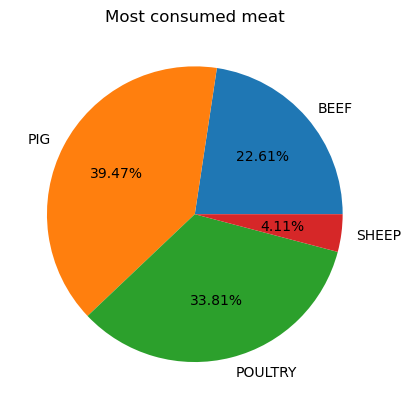

In [233]:
plt.pie(df_1,autopct = '%.2f%%',labels = df_1.index)
plt.title('Most consumed meat')
plt.show()

In [228]:
# Determining the most average consumed meat type
df_11 = df.groupby('meat type')['value'].mean().round(2)
df_11

meat type
BEEF       2031.28
PIG        3545.93
POULTRY    3037.40
SHEEP       368.80
Name: value, dtype: float64

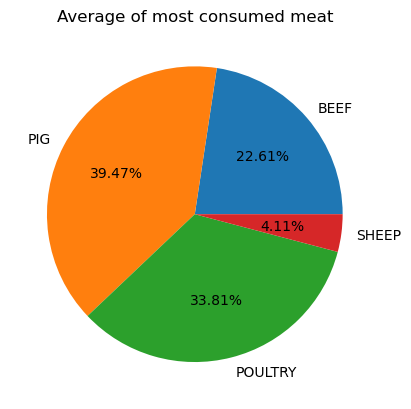

In [234]:
plt.pie(df_11,autopct = '%.2f%%',labels = df_11.index)
plt.title('Average of most consumed meat')
plt.show()

#  
- BRICS, WLD, EU27 and OECD are not countries but a group of countries so they have to be removed  if analysis is being done on countries

In [179]:
#Determining the country with most meant consumption
df_2 = df[(df['country'] != 'WLD') & (df['country'] != 'BRICS') & (df['country'] != 'OECD') & (df['country'] != 'EU27')]
df_22 = df_2.groupby('country')['value'].sum().round(2).reset_index()
df_22= df_22.head(10)
df_22.sort_values(by='value', ascending=False, inplace=True)
df_22

,country,value
6,CHN,2758492.92
2,BRA,652885.08
0,ARG,170525.34
3,CAN,119717.94
1,AUS,97772.97
7,COL,88358.75
8,EGY,80568.00
5,CHL,53617.84
4,CHE,23359.92
9,ETH,18327.69


In [180]:
df_23 = df_2.groupby('country')['value'].sum().round(2).reset_index()
df_23= df_23.tail(10)
df_23.sort_values(by='value', ascending=False, inplace=True)
df_23

,country,value
32,USA,1450560.46
27,RUS,349020.08
33,VNM,171318.72
25,PHL,122632.59
34,ZAF,111600.96
30,TUR,88938.34
31,UKR,88399.23
29,THA,66859.72
28,SAU,54695.22
26,PRY,15303.54


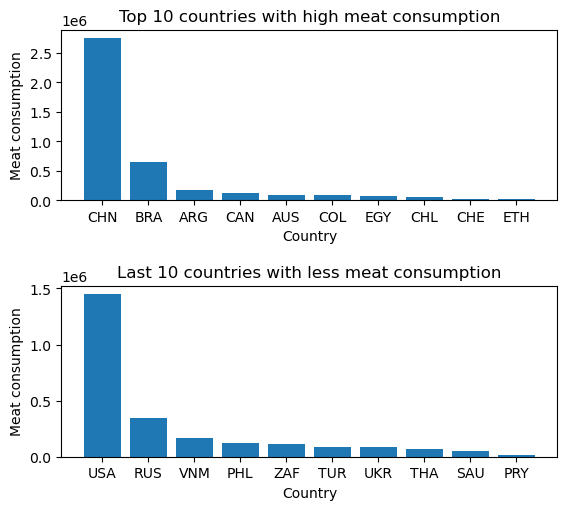

In [275]:
plt.subplot(2,1,1)
plt.bar(df_22['country'], df_22["value"])
plt.title("Top 10 countries with high meat consumption")
plt.xlabel("Country")
plt.ylabel("Meat consumption")

plt.subplot(2,1,2)
plt.bar(df_23['country'], df_23["value"])
plt.title("Last 10 countries with less meat consumption")
plt.xlabel("Country")
plt.ylabel("Meat consumption")
plt.subplots_adjust(bottom=0.01,top=0.9,hspace=0.5)
plt.show()

In [250]:
df_chn = df[df["country"] =="CHN"]
df_chn

,country,indicator,meat type,measure,frequency,year,value
1716,CHN,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.641784
1717,CHN,MEATCONSUMP,BEEF,KG_CAP,A,1991,0.752712
1718,CHN,MEATCONSUMP,BEEF,KG_CAP,A,1992,1.003120
1719,CHN,MEATCONSUMP,BEEF,KG_CAP,A,1993,1.257452
1720,CHN,MEATCONSUMP,BEEF,KG_CAP,A,1994,1.524404
...,...,...,...,...,...,...,...
11082,CHN,MEATCONSUMP,SHEEP,THND_TONNE,A,2024,5526.449160
11083,CHN,MEATCONSUMP,SHEEP,THND_TONNE,A,2025,5603.448262
11084,CHN,MEATCONSUMP,SHEEP,THND_TONNE,A,2026,5680.343046
11085,CHN,MEATCONSUMP,SHEEP,THND_TONNE,A,2027,5756.326114


In [251]:
df_chn_1 = df_chn.groupby('meat type')['value'].mean().round(2)
df_chn_1

meat type
BEEF        2901.86
PIG        23269.22
POULTRY     7329.55
SHEEP       1864.67
Name: value, dtype: float64

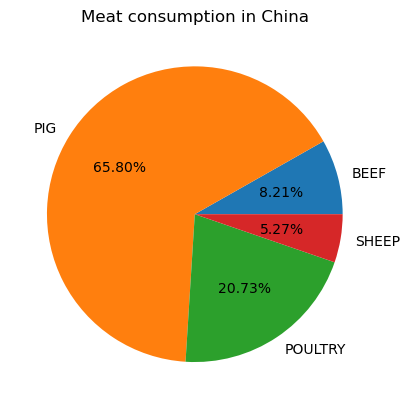

In [262]:
#Pie chart visualization of meat type consumption wiith China
plt.pie(df_chn_1,autopct = '%.2f%%',labels = df_chn_1.index)
plt.title('Meat consumption in China')
plt.show()

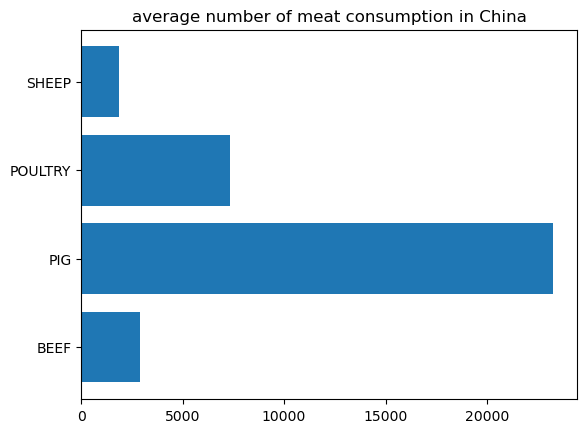

In [265]:
plt.barh(df_chn_1.index,df_chn_1)
plt.title("average number of meat consumption in China")
plt.show()

In [254]:
df_pyr = df[df["country"] =="PRY"]
df_pyr

,country,indicator,meat type,measure,frequency,year,value
3568,PRY,MEATCONSUMP,BEEF,KG_CAP,A,1990,14.260355
3569,PRY,MEATCONSUMP,BEEF,KG_CAP,A,1991,28.434027
3570,PRY,MEATCONSUMP,BEEF,KG_CAP,A,1992,31.768612
3571,PRY,MEATCONSUMP,BEEF,KG_CAP,A,1993,29.730622
3572,PRY,MEATCONSUMP,BEEF,KG_CAP,A,1994,29.123784
...,...,...,...,...,...,...,...
10848,PRY,MEATCONSUMP,PIG,THND_TONNE,A,2024,208.397179
10849,PRY,MEATCONSUMP,PIG,THND_TONNE,A,2025,211.650150
10850,PRY,MEATCONSUMP,PIG,THND_TONNE,A,2026,214.929551
10851,PRY,MEATCONSUMP,PIG,THND_TONNE,A,2027,218.079522


In [259]:
#Determing the meat consumption by Paraguay,the country with the least meat consumption

df_pyr_1 = df_pyr.groupby('meat type')['value'].mean().round(2)
df_pyr_1

meat type
BEEF       80.49
PIG        91.58
POULTRY    22.05
SHEEP       2.08
Name: value, dtype: float64

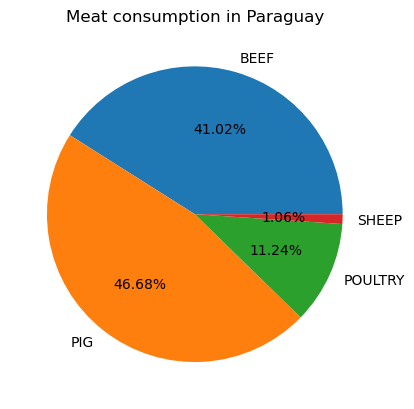

In [260]:
plt.pie(df_pyr_1,autopct = '%.2f%%',labels = df_pyr_1.index)
plt.title('Meat consumption in Paraguay')
plt.show()

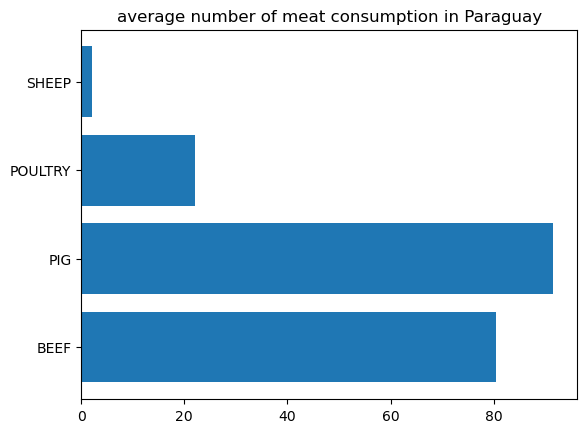

In [267]:
plt.barh(df_pyr_1.index,df_pyr_1)
plt.title("average number of meat consumption in Paraguay")
plt.show()

In [270]:
df_pak = df[df["country"] =="PAK"]
df_pak

,country,indicator,meat type,measure,frequency,year,value
3412,PAK,MEATCONSUMP,BEEF,KG_CAP,A,1990,4.334395
3413,PAK,MEATCONSUMP,BEEF,KG_CAP,A,1991,4.398314
3414,PAK,MEATCONSUMP,BEEF,KG_CAP,A,1992,4.497806
3415,PAK,MEATCONSUMP,BEEF,KG_CAP,A,1993,4.602570
3416,PAK,MEATCONSUMP,BEEF,KG_CAP,A,1994,4.716050
...,...,...,...,...,...,...,...
10341,PAK,MEATCONSUMP,PIG,THND_TONNE,A,2024,0.001000
10342,PAK,MEATCONSUMP,PIG,THND_TONNE,A,2025,0.001000
10343,PAK,MEATCONSUMP,PIG,THND_TONNE,A,2026,0.001000
10344,PAK,MEATCONSUMP,PIG,THND_TONNE,A,2027,0.001000


In [271]:
#Since Pork was the most consumed meat, it was imperative if factors like religion can affect pork consumption in I salamoc countries

df_pak_1 = df_pak.groupby('meat type')['value'].mean().round(2)
df_pak_1

meat type
BEEF       702.03
PIG          0.01
POULTRY    413.32
SHEEP      244.15
Name: value, dtype: float64

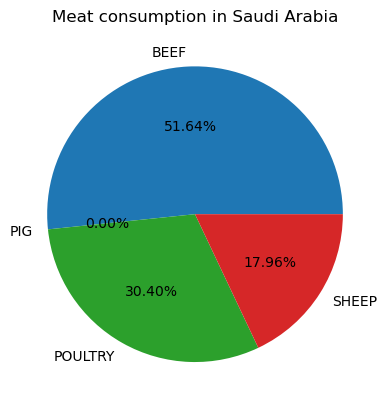

In [272]:
plt.pie(df_pak_1,autopct = '%.2f%%',labels = df_pak_1.index)
plt.title('Meat consumption in Pakistan')
plt.show()

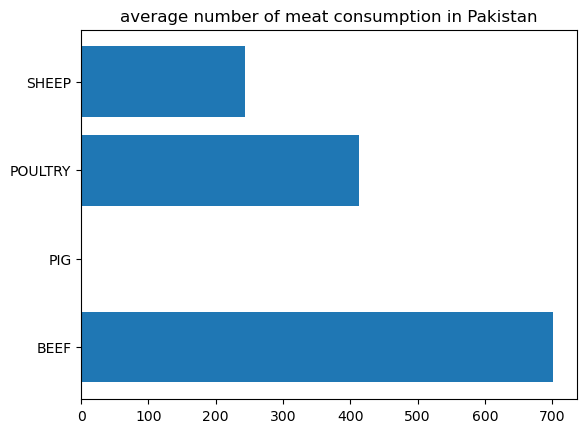

In [273]:
plt.barh(df_pak_1.index,df_pak_1)
plt.title("average number of meat consumption in Pakistan")
plt.show()

In [210]:
#the trend of meat consumption across the years.

df_3 = df.groupby('year')['value'].sum().round(2).reset_index()
df_3

,year,value
0,1990,299335.71
1,1991,329192.78
2,1992,362400.75
3,1993,386909.47
4,1994,408386.69
5,1995,424033.63
6,1996,424783.81
7,1997,449674.70
8,1998,467560.05
9,1999,480097.44


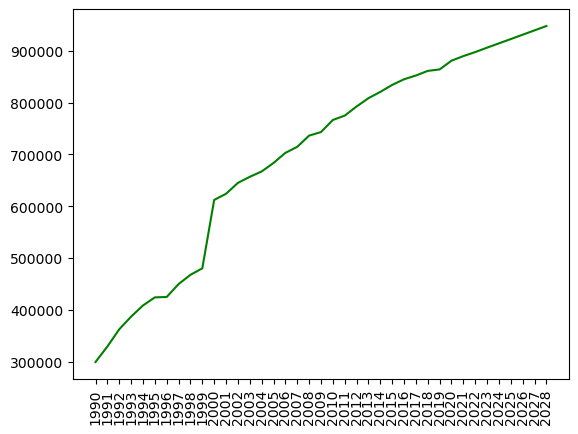

In [211]:
plt.plot(df_3['year'], df_3['value'], color = 'green')
plt.xticks( rotation='vertical')

plt.show()

In [ ]:
# it can be seen clearly that, meat consumption increases as the years increases. 
# But the is the need to look at what happened around 1999 to 2002, since there is a sharp increment in meat consumption